# ML Algorithms from Scratch

**Author: Ali Lesani**  
**Email: lesani.sh.ali@gmail.com**  


**Table of Contents**
* Logistic Regression
* Linear Regression

In [10]:
# Import the necessary modules
from classes.utils import *
from classes.SGD import SGD
from classes.LogisticRegression import LogisticRegression
from classes.LinearRegression import LinearRegression

# Logistic Regression

**Derivation:**


$J(\mathbf{w}) = - \frac{1}{m} \sum_{i = 1}^{m}\left[y^{i} \log{(h_{\mathbf{w}}(\mathbf{x}^{i}))} + (1 - y^{i}) \log{(1 - h_{\mathbf{w}}(\mathbf{x}^{i})}) \right] \qquad \text{Where} \qquad h_{\mathbf{w}}(\mathbf{x}^{i}) = \frac{1}{1 + e^{-\mathbf{w}^{T} \mathbf{x}^{i} + w_o}}$

$\frac{\partial J(\mathbf{w})}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\mathbf{w}}(x^i) - y^i)x_j^i$

$\frac{\partial J(\mathbf{w})}{\partial w_o} = \frac{1}{m} \sum_{i=1}^{m} (h_{\mathbf{w}}(x^i) - y^i)$


Training Epochs: 100%|██████████| 700/700 [00:01<00:00, 425.00it/s]


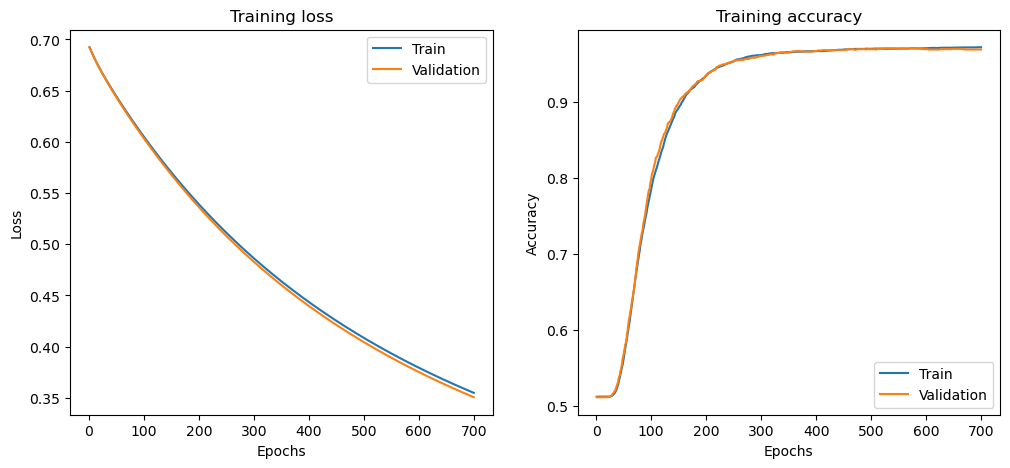

The Logistic Regression accuracy on test data is:  0.97691


In [11]:
# Main function to run the experiments
def main():
    data = load_mnist()
    X_train, y_train = data["train"]
    X_val, y_val = data["val"]
    X_test, y_test = data["test"]
    train_data = X_train, X_val, y_train, y_val

    batch_size = X_train.shape[0]
    input_size = X_train.shape[1]
    num_epochs = 700
    learning_rate = 0.1

    # Logistic Regression Model
    model = LogisticRegression(input_size)

    # Optimizer
    optimizer = SGD(model.get_params_and_grads()[0], learning_rate)

    train_losses, train_accuracies, val_losses, val_accuracies = train(model, train_data, optimizer, num_epochs, batch_size)

    all_losses = [train_losses, val_losses]
    all_accuracies = [train_accuracies, val_accuracies]
    all_labels = ["Train", "Validation"]
    plot_all_results(all_losses, all_accuracies, all_labels)

    # Evaluating test data accuracy
    output = model(X_test)
    y_predict = (output >= 0.5).astype(int)
    acc_lr = compute_accuracy(y_test, y_predict)

    print(f"The Logistic Regression accuracy on test data is: {acc_lr: 0.5f}")

    
if __name__ == "__main__":
    main()

# Linear Regression

**Derivation:**


$J(\mathbf{w}) = \frac{1}{m} \sum_{i = 1}^{m}\frac{1}{2}\left[\mathbf{w}^{T} \mathbf{x}^{i} + w_o - y^{i} \right]^2 \qquad$

$\frac{\partial J(\mathbf{w})}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{w}^{T} \mathbf{x}^{i} + w_o - y^i)x_j^i$

$\frac{\partial J(\mathbf{w})}{\partial w_o} = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{w}^{T} \mathbf{x}^{i} + w_o - y^i)$

In [12]:
# Main function to run the experiments
def main():

    # Generating Synthetic Data
    data = load_synthetic_regression_data(num_samples=500, a=3, b=4)
    X_train, y_train = data["train"]
    X_val, y_val = data["val"]
    X_test, y_test = data["test"]
    train_data = X_train, X_val, y_train, y_val

    batch_size = X_train.shape[0]
    input_size = X_train.shape[1]
    num_epochs = 500
    learning_rate = 0.05

    # Logistic Regression Model
    model = LinearRegression(input_size)

    # Optimizer
    optimizer = SGD(model.get_params_and_grads()[0], learning_rate)

    train_losses, val_losses = train(model, train_data, optimizer, num_epochs, batch_size)

    params = model.get_params_and_grads()[0]
    print(f"a = {params[0].item(): 0.5f} and b = {params[1].item(): 0.5f}")

    
if __name__ == "__main__":
    main()

Training Epochs: 100%|██████████| 500/500 [00:00<00:00, 10677.15it/s]

a =  2.91578 and b =  4.03176
